In [9]:
import sys
sys.path.insert(0, '../../TSProject/')

import random as rd
import math as mt
import numpy as np
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

In [10]:
import graph_class as gc

from algorithms import ALGO_brute_force as eduBF
from algorithms import fabian_bruteForce as fabBF
from algorithms import brute_force_marco as marBF
from algorithms import kris_brute_force as kriBF
from algorithms import greedy as gd
from algorithms import antColonyOptimization as aco
from algorithms import divideAndConquer as divc
from algorithms import branchAndBound as bnb
from algorithms import branchAndBoundBinaryTree as bnbt
from algorithms import ALGO_simulated_annealing as sa
from algorithms import dynamicProgramming as dp


In [3]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [4]:
# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = pdist([coords[idx],coords[idx2]])
            adj_mat[idx2,idx] = pdist([coords[idx],coords[idx2]])
    return adj_mat

In [12]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])
t5 = np.zeros([highN-lowN,1])
t6 = np.zeros([highN-lowN,1])
t7 = np.zeros([highN-lowN,1])
t8 = np.zeros([highN-lowN,1])
t9 = np.zeros([highN-lowN,1])
t10 = np.zeros([highN-lowN,1])
t11 = np.zeros([highN-lowN,1])


for idx in range(lowN,highN):
    coords = createCoords(idx)
    mat = coordWrapper(coords)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)
    t2[idx-lowN], resK = kriBF.bruteForce(coords)
    t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)
    resF2, stuff, t5[idx-lowN] = gd.greedy(graph)
    #print(gd.greedy(graph))
    resF3, stuff, stuff, t6[idx-lowN] = aco.antColonyOptimization(graph, symmetric=True, num_agents=20, max_iter=10000, alpha=2, beta=1)
    
    t7[idx-lowN], resE2, stuff = sa.simulated_annealing(graph)
    #
    resM2, stuff, t8[idx-lowN] = bnb.BranchAndBound(graph)
    resM3, stuff, t9[idx-lowN] = bnbt.BranchAndBoundBinaryTree(graph)
    resM4, stuff, t10[idx-lowN] = divc.DivideAndConquer(graph)
    resM5, stuff, t11[idx-lowN] = dp.DynamicProgramming(graph)
    
    print("For", idx, "nodes:",resF, resF2, resF3, resE2, resM2, resM3, resM4, resM5)

For 6 nodes: 287.0 332.0 289.0 287 287.0 inf 332.0 265.0
For 7 nodes: 274.0 307.0 274.0 274 274.0 inf 313.0 257.0
For 8 nodes: 350.0 417.0 350.0 350 350.0 inf 382.0 292.0
For 9 nodes: 286.0 314.0 286.0 286 286.0 inf 344.0 249.0
For 10 nodes: 224.0 251.0 226.0 238 224.0 inf 242.0 226.0


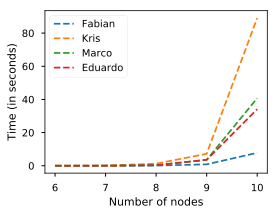

In [23]:
%config InlineBackend.figure_format = 'svg'

highN = 11
lowN = 6

vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Fabian','Kris','Marco','Eduardo'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [7]:
vals

array([[4.99725342e-04, 8.98337364e-03, 4.99010086e-03, 3.99279594e-03],
       [3.99231911e-03, 7.53595829e-02, 4.24203873e-02, 3.09426785e-02],
       [3.34198475e-02, 7.40604639e-01, 3.33396435e-01, 2.89462090e-01],
       [2.51530409e-01, 7.61281061e+00, 3.33329463e+00, 2.75686598e+00],
       [1.96084833e+00, 9.46842349e+01, 3.76558812e+01, 3.04343605e+01]])

In [13]:
files = ['a280','att48',' ','ch150','eli101','pr76']
potentialMin = [2579,10628,7542,6528,629,108159]


for file in files[1:]:
    with open("../data/Symmetrical TSP/"+file+"/"+file+"_json.txt") as myfile:
        data_json = myfile.read().replace('\n','')
    data_json = np.array(eval(data_json))
    data_json = np.array(data_json)[:,1:]
    graph = gc.fully_connected_graph_from_coordinate_list(data_json)
    
    print(gd.greedy(graph=graph)[0])
    print(sa.simulated_annealing(graph=graph,method="SHUFFLE")[1])
    print(aco.antColonyOptimization(graph=graph, num_agents=20, symmetric=True, alpha=2, beta=1)[0])
    print()

42753.0
109531
38383.0

9161.0
23825
9023.0

7700.0
46828
8261.0

851.0
2904


../../TSProject\algorithms\antColonyOptimization.py:97: RuntimeWarning: invalid value encountered in true_divide
  probs = probs/probs[-1]


IndexError: list index out of range

In [8]:
len(data_json)

48